# 013: Comparing 2D Oscillators

A systematic comparison of Hopf, Stuart-Landau, and Van der Pol oscillators.

## Learning Objectives

By the end of this tutorial, you will be able to:

- Compare the mathematical formulations of three fundamental oscillators
- Distinguish between harmonic and relaxation oscillations in phase space
- Choose the appropriate oscillator model for different neuroscience applications
- Understand how bifurcation parameters control oscillation properties

## Background / Theory

### The Three Oscillators

All three oscillators are two-dimensional dynamical systems with state variables $(x, y)$, but they differ fundamentally in their nonlinearity:

| Oscillator | Equations | Nonlinearity Type |
|------------|-----------|-------------------|
| Hopf | $\dot{x} = (a - \beta r^2)x - \omega y$ | Amplitude saturation |
| Stuart-Landau | $\dot{x} = (a - r^2)x - \omega y$ | Amplitude saturation ($\beta=1$) |
| Van der Pol | $\dot{x} = \mu(x - x^3/3 - y)$ | Nonlinear damping |

### Key Properties

| Property | Hopf | Stuart-Landau | Van der Pol |
|----------|------|---------------|-------------|
| Bifurcation parameter | $a$ | $a$ | Always oscillates ($\mu > 0$) |
| Limit cycle amplitude | $\sqrt{a/\beta}$ | $\sqrt{a}$ | $\approx 2$ (fixed) |
| Waveform | Sinusoidal | Sinusoidal | Relaxation (high $\mu$) |
| Phase portrait | Circular | Circular | Distorted |
| Subcritical regime | $a < 0$ | $a < 0$ | N/A |

### When to Use Each

| Application | Recommended Oscillator |
|-------------|------------------------|
| Amplitude-tunable rhythms | Hopf or Stuart-Landau |
| Canonical Hopf normal form | Stuart-Landau |
| Flexible amplitude control | Hopf (with $\beta$) |
| Bursting/spiking neurons | Van der Pol |
| Slow-fast dynamics | Van der Pol (high $\mu$) |

## Implementation

### Step 1: Setup and Imports

In [1]:
import brainunit as u
import matplotlib.pyplot as plt
import numpy as np

import brainmass
import brainstate

# Set simulation time step
brainstate.environ.set(dt=0.1 * u.ms)

# Plotting settings
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.size'] = 10

In [2]:
def simulate_oscillator(model, n_steps=3000, init_x=0.5, init_y=0.0):
    """Simulate an oscillator and return time, x, y trajectories."""
    model.init_all_states()
    model.x.value = np.array([init_x])
    model.y.value = np.array([init_y])

    def step(i):
        model.update()
        return model.x.value, model.y.value

    x, y = brainstate.transform.for_loop(step, np.arange(n_steps))
    t = np.arange(n_steps) * brainstate.environ.get_dt()
    return t, x.flatten(), y.flatten()

### Step 2: Direct Comparison

Simulate all three oscillators with comparable parameters:

In [3]:
# Create oscillators
hopf = brainmass.HopfStep(1, a=0.5, w=0.3, beta=1.0)
stuart_landau = brainmass.StuartLandauStep(1, a=0.5, w=0.3)
van_der_pol = brainmass.VanDerPolStep(1, mu=1.0)

# Simulate
t_hopf, x_hopf, y_hopf = simulate_oscillator(hopf)
t_sl, x_sl, y_sl = simulate_oscillator(stuart_landau)
t_vdp, x_vdp, y_vdp = simulate_oscillator(van_der_pol)

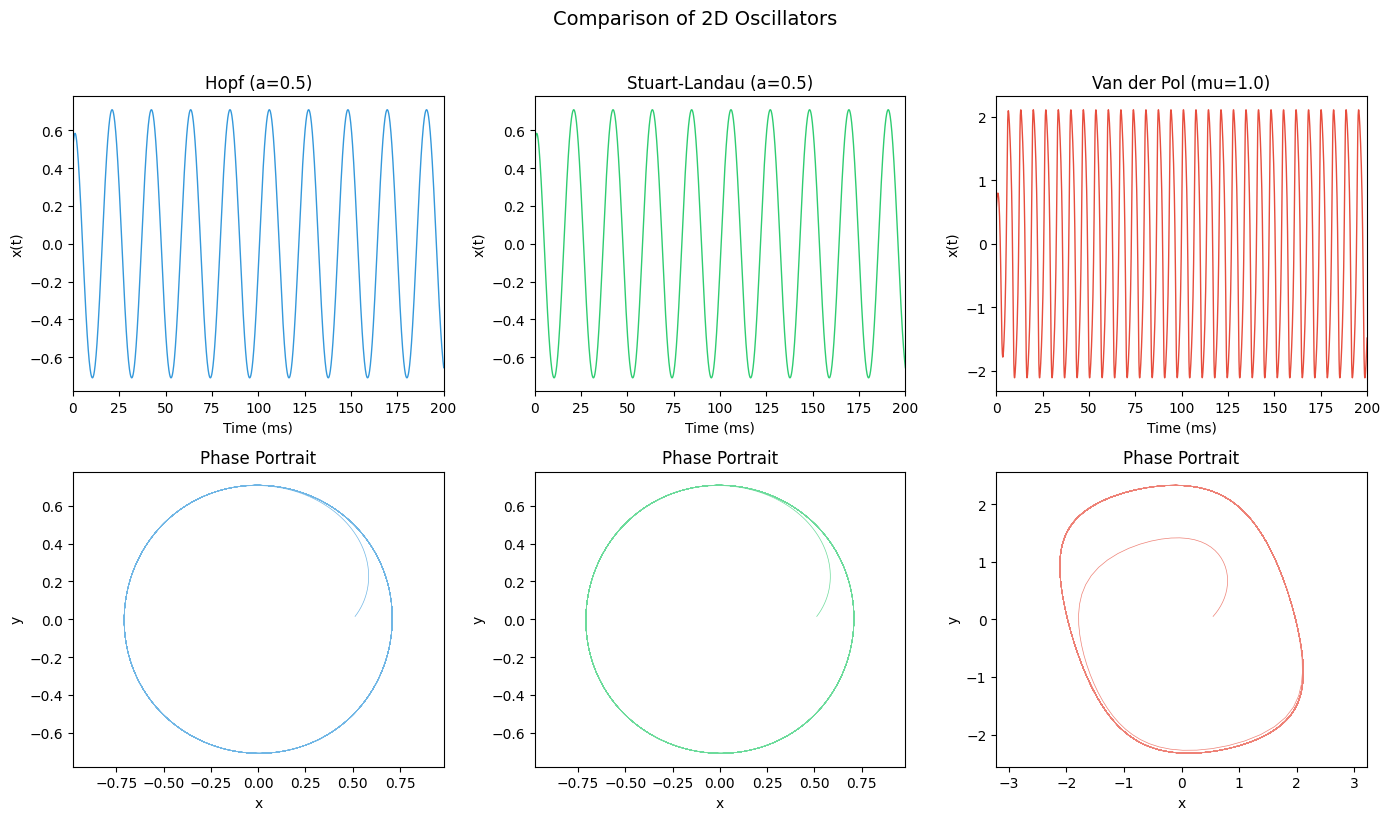

In [4]:
fig, axes = plt.subplots(2, 3, figsize=(14, 8))

# Colors
colors = ['#3498db', '#2ecc71', '#e74c3c']
titles = ['Hopf (a=0.5)', 'Stuart-Landau (a=0.5)', 'Van der Pol (mu=1.0)']
data = [(t_hopf, x_hopf, y_hopf), (t_sl, x_sl, y_sl), (t_vdp, x_vdp, y_vdp)]

for col, (t, x, y) in enumerate(data):
    # Time series (top row)
    axes[0, col].plot(t, x, color=colors[col], linewidth=1)
    axes[0, col].set_xlabel('Time (ms)')
    axes[0, col].set_ylabel('x(t)')
    axes[0, col].set_title(titles[col])
    axes[0, col].set_xlim([0, 200])

    # Phase portrait (bottom row)
    axes[1, col].plot(x, y, color=colors[col], linewidth=0.5, alpha=0.7)
    axes[1, col].set_xlabel('x')
    axes[1, col].set_ylabel('y')
    axes[1, col].set_title('Phase Portrait')
    axes[1, col].set_aspect('equal', adjustable='datalim')

plt.suptitle('Comparison of 2D Oscillators', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

### Step 3: Subcritical vs Supercritical Regimes

Compare damped and sustained oscillation regimes:

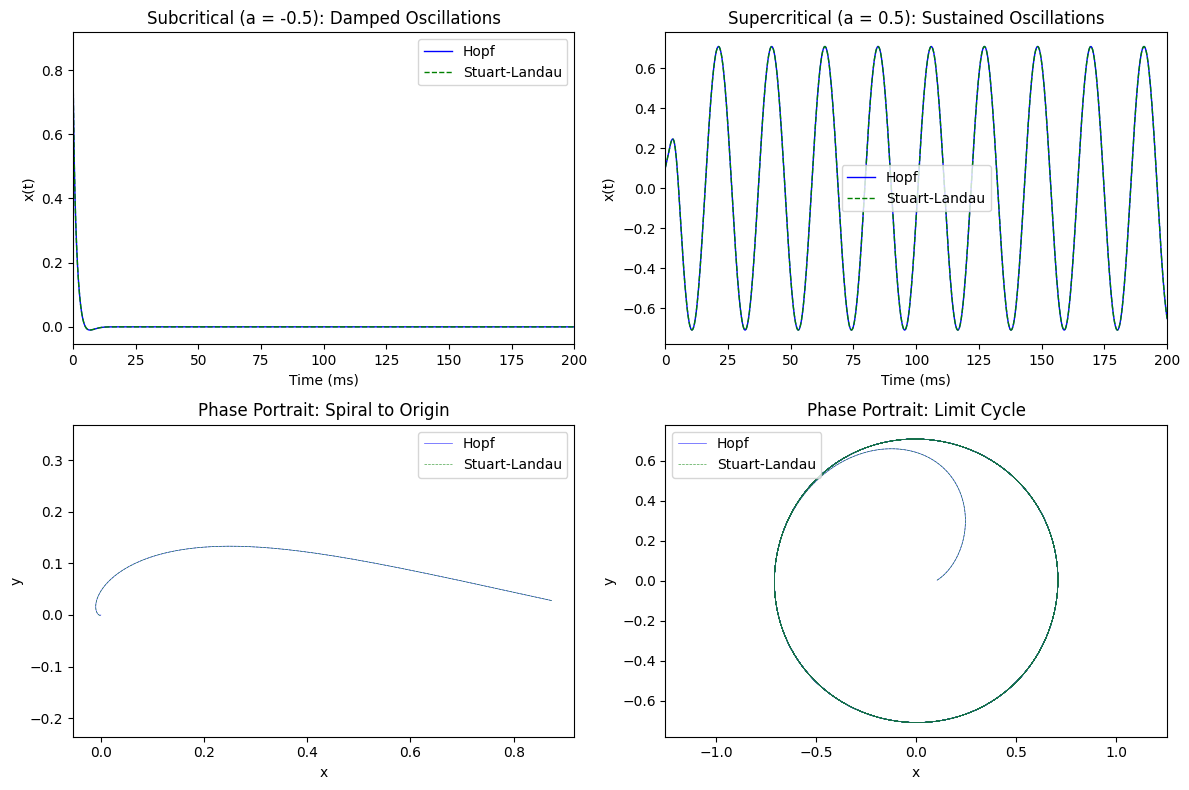

In [5]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Subcritical (a < 0) - damped oscillations
hopf_sub = brainmass.HopfStep(1, a=-0.5, w=0.3, beta=1.0)
sl_sub = brainmass.StuartLandauStep(1, a=-0.5, w=0.3)

t_h_sub, x_h_sub, y_h_sub = simulate_oscillator(hopf_sub, init_x=1.0)
t_s_sub, x_s_sub, y_s_sub = simulate_oscillator(sl_sub, init_x=1.0)

# Supercritical (a > 0) - sustained oscillations  
hopf_sup = brainmass.HopfStep(1, a=0.5, w=0.3, beta=1.0)
sl_sup = brainmass.StuartLandauStep(1, a=0.5, w=0.3)

t_h_sup, x_h_sup, y_h_sup = simulate_oscillator(hopf_sup, init_x=0.1)
t_s_sup, x_s_sup, y_s_sup = simulate_oscillator(sl_sup, init_x=0.1)

# Plot subcritical
axes[0, 0].plot(t_h_sub, x_h_sub, 'b-', label='Hopf', linewidth=1)
axes[0, 0].plot(t_s_sub, x_s_sub, 'g--', label='Stuart-Landau', linewidth=1)
axes[0, 0].set_xlabel('Time (ms)')
axes[0, 0].set_ylabel('x(t)')
axes[0, 0].set_title('Subcritical (a = -0.5): Damped Oscillations')
axes[0, 0].legend()
axes[0, 0].set_xlim([0, 200])

axes[1, 0].plot(x_h_sub, y_h_sub, 'b-', label='Hopf', linewidth=0.5, alpha=0.7)
axes[1, 0].plot(x_s_sub, y_s_sub, 'g--', label='Stuart-Landau', linewidth=0.5, alpha=0.7)
axes[1, 0].set_xlabel('x')
axes[1, 0].set_ylabel('y')
axes[1, 0].set_title('Phase Portrait: Spiral to Origin')
axes[1, 0].legend()
axes[1, 0].set_aspect('equal', adjustable='datalim')

# Plot supercritical
axes[0, 1].plot(t_h_sup, x_h_sup, 'b-', label='Hopf', linewidth=1)
axes[0, 1].plot(t_s_sup, x_s_sup, 'g--', label='Stuart-Landau', linewidth=1)
axes[0, 1].set_xlabel('Time (ms)')
axes[0, 1].set_ylabel('x(t)')
axes[0, 1].set_title('Supercritical (a = 0.5): Sustained Oscillations')
axes[0, 1].legend()
axes[0, 1].set_xlim([0, 200])

axes[1, 1].plot(x_h_sup, y_h_sup, 'b-', label='Hopf', linewidth=0.5, alpha=0.7)
axes[1, 1].plot(x_s_sup, y_s_sup, 'g--', label='Stuart-Landau', linewidth=0.5, alpha=0.7)
axes[1, 1].set_xlabel('x')
axes[1, 1].set_ylabel('y')
axes[1, 1].set_title('Phase Portrait: Limit Cycle')
axes[1, 1].legend()
axes[1, 1].set_aspect('equal', adjustable='datalim')

plt.tight_layout()
plt.show()

### Step 4: Van der Pol - Transition to Relaxation Oscillations

Explore how $\mu$ affects the waveform:

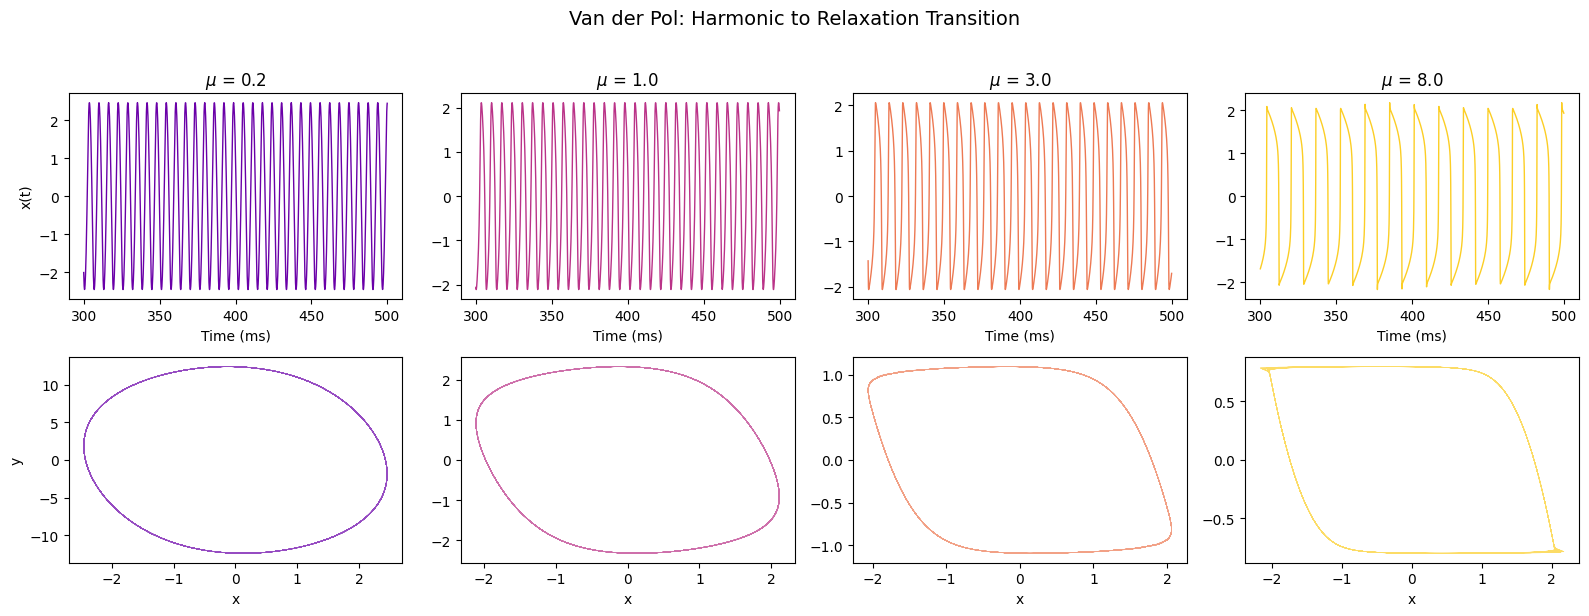

In [6]:
mu_values = [0.2, 1.0, 3.0, 8.0]
colors = plt.cm.plasma(np.linspace(0.2, 0.9, len(mu_values)))

fig, axes = plt.subplots(2, len(mu_values), figsize=(16, 6))

for idx, (mu, color) in enumerate(zip(mu_values, colors)):
    vdp = brainmass.VanDerPolStep(1, mu=mu)
    t, x, y = simulate_oscillator(vdp, n_steps=5000)

    # Time series (show steady state)
    axes[0, idx].plot(t[-2000:], x[-2000:], color=color, linewidth=1)
    axes[0, idx].set_xlabel('Time (ms)')
    if idx == 0:
        axes[0, idx].set_ylabel('x(t)')
    axes[0, idx].set_title(f'$\\mu$ = {mu}')

    # Phase portrait
    axes[1, idx].plot(x[-2000:], y[-2000:], color=color, linewidth=0.5, alpha=0.7)
    axes[1, idx].set_xlabel('x')
    if idx == 0:
        axes[1, idx].set_ylabel('y')

plt.suptitle('Van der Pol: Harmonic to Relaxation Transition', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

### Step 5: Waveform Shape Comparison

Overlay normalized waveforms to highlight shape differences:

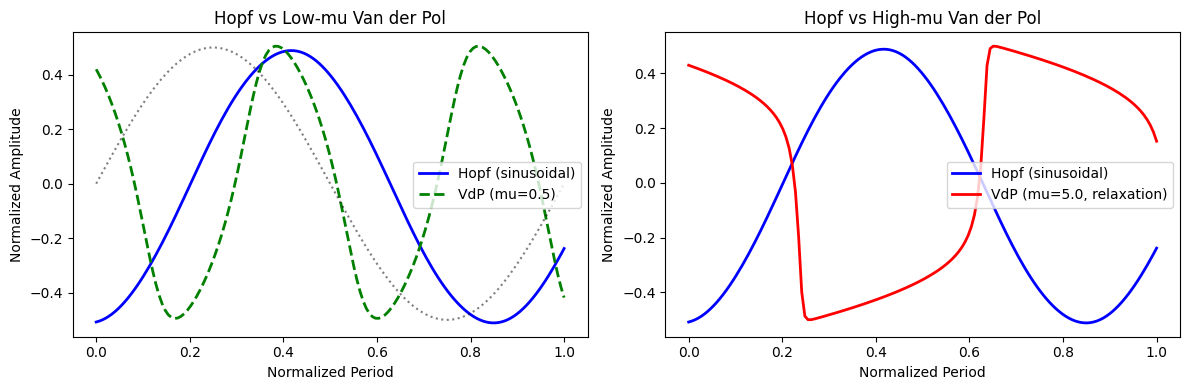

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Create oscillators with similar frequencies
hopf = brainmass.HopfStep(1, a=1.0, w=0.5, beta=1.0)
vdp_low = brainmass.VanDerPolStep(1, mu=0.5)
vdp_high = brainmass.VanDerPolStep(1, mu=5.0)

t_h, x_h, _ = simulate_oscillator(hopf, n_steps=3000)
t_vl, x_vl, _ = simulate_oscillator(vdp_low, n_steps=3000)
t_vh, x_vh, _ = simulate_oscillator(vdp_high, n_steps=3000)


# Normalize for comparison
def normalize(x):
    x = x[-1000:]  # Steady state
    return (x - x.mean()) / (x.max() - x.min())


x_h_norm = normalize(x_h)
x_vl_norm = normalize(x_vl)
x_vh_norm = normalize(x_vh)

# One cycle comparison
n_samples = 150
axes[0].plot(np.linspace(0, 1, n_samples), x_h_norm[:n_samples], 'b-', label='Hopf (sinusoidal)', linewidth=2)
axes[0].plot(np.linspace(0, 1, n_samples), x_vl_norm[:n_samples], 'g--', label='VdP (mu=0.5)', linewidth=2)
axes[0].set_xlabel('Normalized Period')
axes[0].set_ylabel('Normalized Amplitude')
axes[0].set_title('Hopf vs Low-mu Van der Pol')
axes[0].legend()

# Add reference sine wave
t_ref = np.linspace(0, 2 * np.pi, n_samples)
axes[0].plot(np.linspace(0, 1, n_samples), 0.5 * np.sin(t_ref), 'k:', alpha=0.5, label='Pure sine')

# Relaxation comparison
axes[1].plot(np.linspace(0, 1, n_samples), x_h_norm[:n_samples], 'b-', label='Hopf (sinusoidal)', linewidth=2)
axes[1].plot(np.linspace(0, 1, n_samples), x_vh_norm[:n_samples], 'r-', label='VdP (mu=5.0, relaxation)', linewidth=2)
axes[1].set_xlabel('Normalized Period')
axes[1].set_ylabel('Normalized Amplitude')
axes[1].set_title('Hopf vs High-mu Van der Pol')
axes[1].legend()

plt.tight_layout()
plt.show()

### Step 6: Amplitude Control Comparison

Compare how each oscillator's amplitude responds to parameter changes:

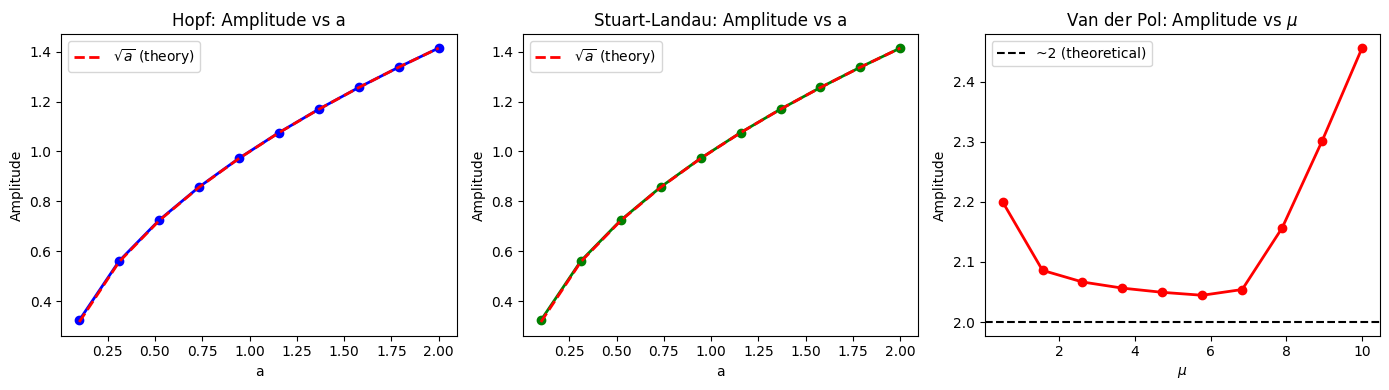

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(14, 4))

# Hopf: vary a
a_values = np.linspace(0.1, 2.0, 10)
hopf_amplitudes = []
for a in a_values:
    model = brainmass.HopfStep(1, a=a, w=0.3, beta=1.0)
    _, x, _ = simulate_oscillator(model, n_steps=2000)
    hopf_amplitudes.append((x[-500:].max() - x[-500:].min()) / 2)

axes[0].plot(a_values, hopf_amplitudes, 'bo-', linewidth=2, markersize=6)
axes[0].plot(a_values, np.sqrt(a_values), 'r--', linewidth=2, label=r'$\sqrt{a}$ (theory)')
axes[0].set_xlabel('a')
axes[0].set_ylabel('Amplitude')
axes[0].set_title('Hopf: Amplitude vs a')
axes[0].legend()

# Stuart-Landau: same as Hopf with beta=1
sl_amplitudes = []
for a in a_values:
    model = brainmass.StuartLandauStep(1, a=a, w=0.3)
    _, x, _ = simulate_oscillator(model, n_steps=2000)
    sl_amplitudes.append((x[-500:].max() - x[-500:].min()) / 2)

axes[1].plot(a_values, sl_amplitudes, 'go-', linewidth=2, markersize=6)
axes[1].plot(a_values, np.sqrt(a_values), 'r--', linewidth=2, label=r'$\sqrt{a}$ (theory)')
axes[1].set_xlabel('a')
axes[1].set_ylabel('Amplitude')
axes[1].set_title('Stuart-Landau: Amplitude vs a')
axes[1].legend()

# Van der Pol: amplitude is roughly fixed (~2)
mu_values = np.linspace(0.5, 10, 10)
vdp_amplitudes = []
for mu in mu_values:
    model = brainmass.VanDerPolStep(1, mu=mu)
    _, x, _ = simulate_oscillator(model, n_steps=5000)
    vdp_amplitudes.append((x[-1000:].max() - x[-1000:].min()) / 2)

axes[2].plot(mu_values, vdp_amplitudes, 'ro-', linewidth=2, markersize=6)
axes[2].axhline(2.0, color='k', linestyle='--', label='~2 (theoretical)')
axes[2].set_xlabel(r'$\mu$')
axes[2].set_ylabel('Amplitude')
axes[2].set_title(r'Van der Pol: Amplitude vs $\mu$')
axes[2].legend()

plt.tight_layout()
plt.show()

### Step 7: Frequency Analysis

Compare spectral properties:

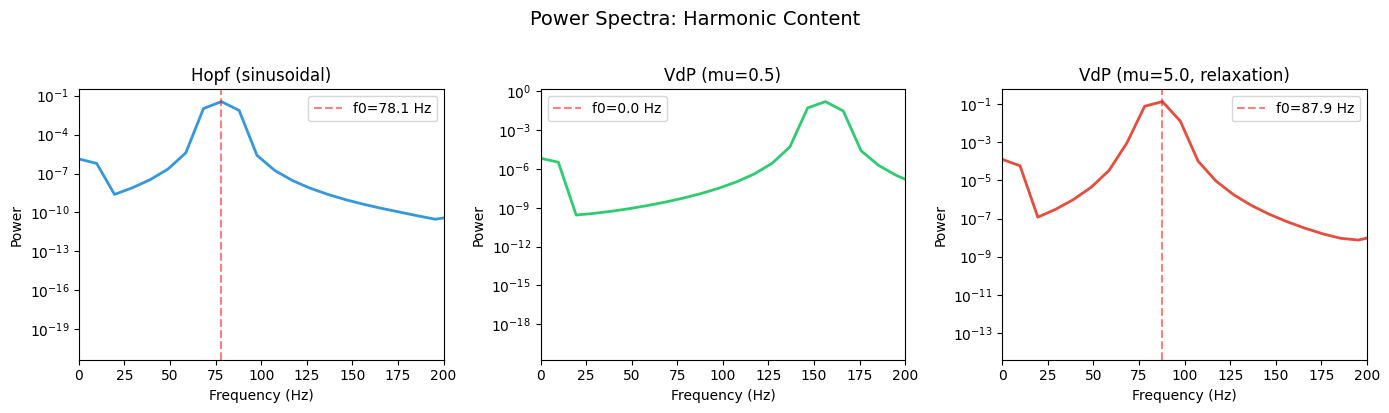

In [9]:
from scipy import signal

fig, axes = plt.subplots(1, 3, figsize=(14, 4))

# Create oscillators
hopf = brainmass.HopfStep(1, a=1.0, w=0.5, beta=1.0)
vdp_low = brainmass.VanDerPolStep(1, mu=0.5)
vdp_high = brainmass.VanDerPolStep(1, mu=5.0)

models = [hopf, vdp_low, vdp_high]
titles = ['Hopf (sinusoidal)', 'VdP (mu=0.5)', 'VdP (mu=5.0, relaxation)']
colors = ['#3498db', '#2ecc71', '#e74c3c']

dt_ms = float(brainstate.environ.get_dt() / u.ms)
fs = 1000 / dt_ms  # Sampling frequency in Hz

for idx, (model, title, color) in enumerate(zip(models, titles, colors)):
    t, x, _ = simulate_oscillator(model, n_steps=10000)
    x_ss = x[-5000:]  # Steady state

    # Power spectrum
    f, Pxx = signal.welch(x_ss, fs=fs, nperseg=1024)

    axes[idx].semilogy(f, Pxx, color=color, linewidth=2)
    axes[idx].set_xlabel('Frequency (Hz)')
    axes[idx].set_ylabel('Power')
    axes[idx].set_title(title)
    axes[idx].set_xlim([0, 200])

    # Mark harmonics
    peak_idx = np.argmax(Pxx[f < 100])
    f_peak = f[peak_idx]
    axes[idx].axvline(f_peak, color='red', linestyle='--', alpha=0.5, label=f'f0={f_peak:.1f} Hz')
    axes[idx].legend()

plt.suptitle('Power Spectra: Harmonic Content', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

### Step 8: Summary Table

## Summary Table

| Property | Hopf Oscillator | Stuart-Landau | Van der Pol |
|----------|-----------------|---------------|-------------|
| Bifurcation parameter | $a$ | $a$ | Always oscillates for $\mu > 0$ |
| Limit cycle amplitude | $\sqrt{a/\beta}$ | $\sqrt{a}$ | $\approx 2$ (fixed) |
| Waveform shape | Sinusoidal | Sinusoidal | Relaxation (at high $\mu$) |
| Phase portrait | Circular | Circular | Distorted |
| Nonlinearity source | Amplitude saturation | Amplitude saturation | Nonlinear damping |
| Neuroscience use | Neural oscillators | Phase amplitude coupling | Bursting neurons |

## Exercises

### Exercise 1: Hopf Beta Parameter

Explore how the $\beta$ parameter in Hopf affects amplitude:

```python
beta_values = [0.5, 1.0, 2.0, 4.0]
# With fixed a=1.0, the amplitude should be sqrt(a/beta)
# Verify this relationship numerically
```

### Exercise 2: Phase Response

Apply a brief perturbation to each oscillator and compare recovery:

```python
# At t=500ms, add a perturbation to x
# How quickly does each oscillator return to the limit cycle?
```

### Exercise 3: Noise Sensitivity

Add OU noise to each oscillator and compare variability:

```python
noise = brainmass.OUProcess(1, sigma=0.1, tau=10.0 * u.ms)
# Question: Which oscillator is most robust to noise?
```

## Summary

In this tutorial, you learned:

1. **Three fundamental oscillators**: Hopf, Stuart-Landau, and Van der Pol
2. **Harmonic vs relaxation oscillations**: Different nonlinearity sources
3. **Amplitude control**: $\sqrt{a/\beta}$ for Hopf, $\sqrt{a}$ for Stuart-Landau, fixed for Van der Pol
4. **Parameter regimes**: Subcritical (damped) vs supercritical (sustained)

### Key Insights

| Need | Best Choice |
|------|-------------|
| Tunable amplitude rhythms | Hopf or Stuart-Landau |
| Canonical bifurcation analysis | Stuart-Landau |
| Sharp spike-like waveforms | Van der Pol (high $\mu$) |
| Slow-fast neural dynamics | Van der Pol |

### Relationship to Neural Models

- **Hopf/Stuart-Landau**: Model neural oscillations with controllable power
- **Van der Pol**: Closely related to FitzHugh-Nagumo (Tutorial 014)
- All three can be extended to networks with coupling

## References

1. Strogatz, S. H. (2015). *Nonlinear Dynamics and Chaos*. Westview Press. (Chapters 7-8)

2. Izhikevich, E. M. (2007). *Dynamical Systems in Neuroscience*. MIT Press. (Chapter 4)

3. van der Pol, B. (1926). On relaxation-oscillations. *The London, Edinburgh, and Dublin Philosophical Magazine*, 2(11), 978-992.

4. Stuart, J. T. (1960). On the non-linear mechanics of wave disturbances. *Journal of Fluid Mechanics*, 9(3), 353-370.